The yield to maturity (YTM) measures the interest rate, as implied by the bond,
that takes into account the present value of all the future coupon payments and
the principal. It is assumed that bond holders can invest received coupons at the
YTM rate until the maturity of the bond; according to risk-neutral expectations,
the payments received should be the same as the price paid for the bond.
Let's take a look at an example of a 5.75 percent bond that will mature in 1.5 years
with a par value of 100. The price of the bond is $95.0428 and coupons are paid
semi-annually. The pricing equation can be stated as follows:
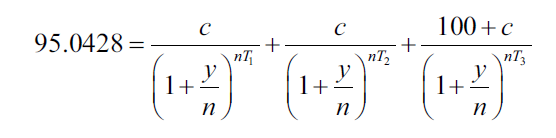
Here, c is the coupon dollar amount paid at each time period, T is the time period of
payment in years, n is the coupon payment frequency, and y is the YTM that we are
interested to solve. To solve for YTM is typically a complex process, and most bond
YTM calculators use Newton's method as an iterative process.
The bond YTM calculator is illustrated by the following Python code.

In [1]:
import scipy.optimize as optimize
 
 
def bond_ytm(price, par, T, coup, freq=2, guess=0.05):
    freq = float(freq)
    periods = T*freq
    coupon = coup/100.*par/freq
    dt = [(i+1)/freq for i in range(int(periods))]
    ytm_func = lambda y: \
        sum([coupon/(1+y/freq)**(freq*T) for T in dt]) + \
        par/(1+y/freq)**(freq*T) - price
         
    return optimize.newton(ytm_func, guess)
 
if __name__ == "__main__":
    ytm = bond_ytm(95.0428, 100, 1.5, 5.75, 2)
    print(ytm)

0.09369155345239522


Remember that we covered the use of Newton's method and other nonlinear
function root solvers in Chapter 3, Nonlinearity in Finance. For this YTM calculator
function, we used the scipy.optimize package to solve for the YTM.

The YTM of the bond is 9.369 percent. Now we have a bond YTM calculator that can
help us compare a bond's expected return with those of other securities.